In [177]:
import pandas as pd
from PIL import Image
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [157]:
PATH_TO_ANNOTATIONS_FILE = 'data/annotations.json'
PATH_TO_IMAGES_FILE = 'data/images.json'

In [158]:
annotations_file = Path(PATH_TO_ANNOTATIONS_FILE)
images_file = Path(PATH_TO_IMAGES_FILE)

In [159]:
annotations = pd.read_json(annotations_file)
images = pd.read_json(images_file)

annotations = annotations.set_index('id')
images = images.set_index('image_id')

In [160]:
annotations

,image_id,x_points,y_points,label
id,,,,
1,2401,"[142, 150, 557, 547, 139]","[175, 534, 537, 181, 177]",spare parts
2,2408,"[104, 107, 923, 933, 103]","[208, 557, 556, 193, 210]",textile
3,2313,"[111, 113, 312, 314, 415, 415, 308, 307, 109]","[165, 569, 572, 404, 399, 207, 202, 180, 170]",tableware
4,2319,"[403, 404, 600, 597, 403]","[177, 550, 538, 172, 180]",spare parts
5,2396,"[423, 419, 421, 643, 627, 418]","[476, 467, 574, 576, 481, 475]",tools
...,...,...,...,...
48539,14752,"[802, 788, 1696, 2186, 2177, 1912, 1899, 1736,...","[735, 1005, 1017, 1001, 495, 496, 375, 363, 23...",spare parts
48540,14752,"[2464, 2459, 4283, 4285, 4077, 3994, 3967, 353...","[688, 1062, 1107, 654, 603, 579, 534, 619, 572...",spare parts
48545,14775,"[1731, 1750, 1748, 1686, 1686, 1598, 1499, 149...","[154, 239, 280, 297, 354, 361, 413, 474, 508, ...",car wheels


In [161]:
images

,md5,filepath,size
image_id,,,
1,2ac2bd4c9f8fc3aab4dd1419cc160381,data/images/00001.tif,412437
2,e2985904e1d3082ab88348447ea3850b,data/images/00002.tif,389661
3,eebc5fc48f7225c5c999a3ae4f2a4f7a,data/images/00003.tif,395753
4,2303a680d8c54c1a0d4c5c355583f0c4,data/images/00004.tif,317451
5,ab319242395a1ca38b2ed771a3452931,data/images/00005.tif,302397
...,...,...,...
15865,bfeb1e836eff5c7dfefab238b608c9ab,data/images/03DF9.tif,15215946
15866,bb5fa1d74f0eab1c812965b63d4ead2d,data/images/03DFA.tif,15278262
15867,42cb675746525434baec2f7ed5444f63,data/images/03DFB.tif,15243642


In [ ]:
combined = annotations.join(images)

In [176]:
print('{} labels'.format(len(
    annotations.loc[annotations['label'].notna(), 'label'].unique())))
print('{} image files'.format(len(
    images)))
print('{} bounding boxes'.format(len(
    annotations)))
print('{} bounding boxes with labels'.format(len(
    annotations.loc[annotations['label'].notna()])))
print('{} images has bounding boxes'.format(len(
    combined.loc[combined['filepath'].notna()])))
print('{} images has bounding boxes with labels'.format(len(
    combined.loc[combined['filepath'].notna() & combined['label'].notna()])))
print('{} images are missing'.format(len(
    combined.loc[combined['filepath'].isna(), 'image_id'].unique())))


102 labels
14147 image files
24358 bounding boxes
18818 bounding boxes with labels
9687 images has bounding boxes
8189 images has bounding boxes with labels
8662 images are missing


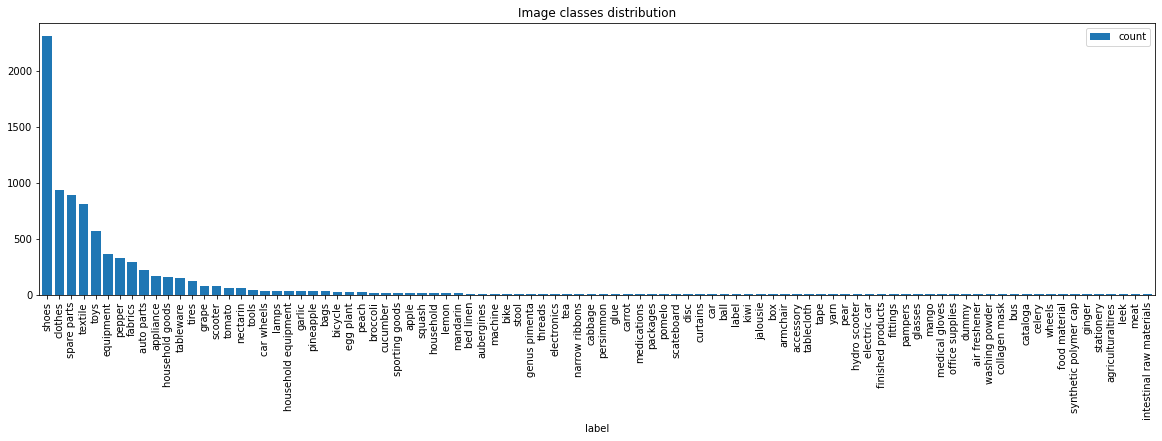

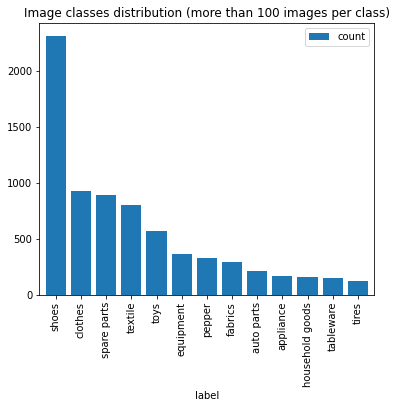

In [163]:
hist = combined.loc[combined['filepath'].notna() & combined['label'].notna(),
                    ['image_id', 'label']] \
    .groupby('label') \
    .count() \
    .rename(columns={'image_id': 'count'}) \
    .sort_values('count', ascending=False)

ax = hist.plot.bar(figsize=(20, 5),
                  title='Image classes distribution',
                  sort_columns=True,
                  width=0.8,
                  fontsize=10)
ax.set_facecolor('w')

ax = hist[hist['count'] > 100].plot.bar(figsize=(6, 5),
                                       title='Image classes distribution (more than 100 images per class)',
                                       sort_columns=True,
                                       width=0.8,
                                       fontsize=10)
ax.set_facecolor('w')